# Deep Learning Challenge

## Data Exploration

Before we begin any Machine Learning or Deep Learning problem, it is required to explore the data we are provided.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,row_id,age,gender,view_position,image_name,detected
0,id_0,45,M,0,scan_0000.png,class_3
1,id_1,57,F,0,scan_0001.png,class_3
2,id_10,58,M,0,scan_00010.png,class_3
3,id_1000,64,M,0,scan_0001000.png,class_6
4,id_10000,33,M,1,scan_00010000.png,class_3


We load the `csv` files to the `test` and `train` dataframes. The `train` data consists of 6 attributes. The `detected` is our target variable.

In [4]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 18577 images.
The test data has 12386 images.


In [5]:
print ('The train data has {} unique classes'.format(train['detected'].nunique()))

The train data has 14 unique classes


Let us look at the distribution of target variable.

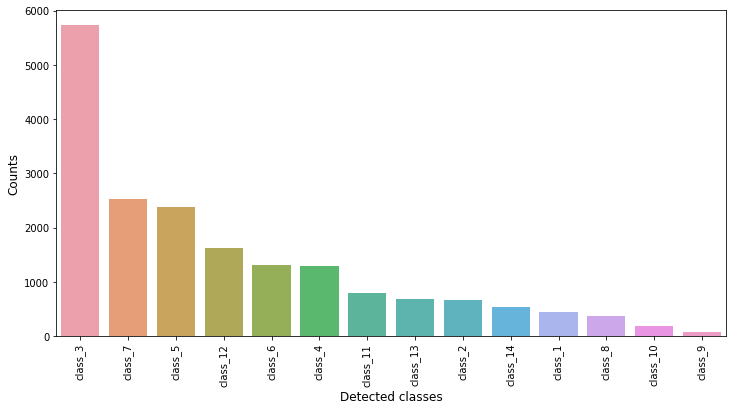

In [6]:
detected_counts = train.detected.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(detected_counts.index, detected_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Detected classes', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

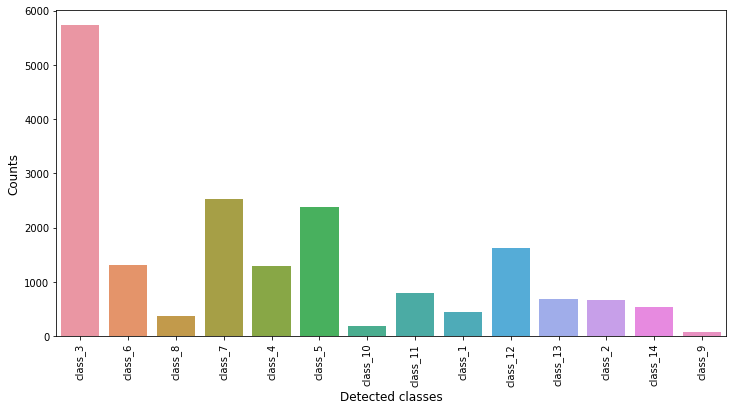

In [7]:
plt.figure(figsize = (12,6))
sns.countplot(train['detected'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Detected classes', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

`class_3` has the highest occurence followed by `class_7`. In comparision `class_9` has the least number.

### Age

In [9]:
train.age.describe()

count    18577.000000
mean        47.972601
std         16.741076
min          2.000000
25%         36.000000
50%         50.000000
75%         60.000000
max        414.000000
Name: age, dtype: float64

In [26]:
print ('In train data Age feature has maximum value {} year.'.format(train.age.max()))
print ('In train data Age feature has minimum value {} year.'.format(train.age.min()))

In train data Age feature has maximum value 414 year.
In train data Age feature has minimum value 2 year.


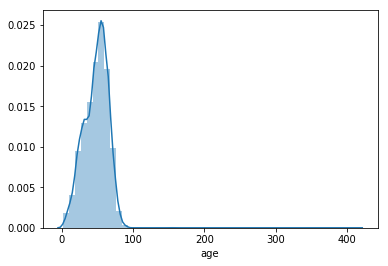

In [19]:
sns.distplot(train.age,bins=50)

In [21]:
test.age.describe()

count    12386.000000
mean        48.028984
std         16.660680
min          1.000000
25%         36.000000
50%         50.000000
75%         60.000000
max        152.000000
Name: age, dtype: float64

In [25]:
print ('In test data Age feature has maximum value {} year.'.format(test.age.max()))
print ('In test data Age feature has minimum value {} year.'.format(test.age.min()))

In test data Age feature has maximum value 152 year.
In test data Age feature has minimum value 1 year.


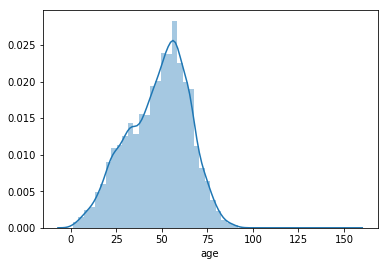

In [27]:
sns.distplot(test.age,bins=50)

## Loading the image data

In [8]:
TRAIN_PATH = 'train_images/'
TEST_PATH = 'test_images/'

We define the paths to the image folders(the images have already been extracted).

In [9]:
import cv2

We import the OpenCV(`cv2`) library. OpenCV is a powerful computer vision library we are going to use for image manipulation.
Let us load a sample image to explore.

In [11]:
img = cv2.imread(TRAIN_PATH + 'scan_0000.png')

In [13]:
img.shape

(1024, 1024, 3)

Unlike humans, a computer cannot recognise an image as it is. The computer cannot see shapes or colors. To a computer, any image is read as an array of numbers.

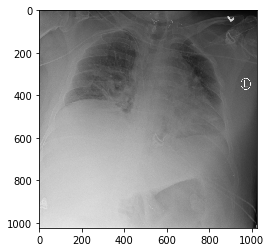

In [14]:
plt.imshow(img)

While a human being seees an image as above, a computer sees it as below:

In [15]:
img

array([[[  0,   0,   0],
        [ 57,  57,  57],
        [ 81,  81,  81],
        ..., 
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[  0,   0,   0],
        [ 54,  54,  54],
        [ 71,  71,  71],
        ..., 
        [  4,   4,   4],
        [  4,   4,   4],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [ 55,  55,  55],
        [ 74,  74,  74],
        ..., 
        [  5,   5,   5],
        [  5,   5,   5],
        [  7,   7,   7]],

       ..., 
       [[  0,   0,   0],
        [151, 151, 151],
        [241, 241, 241],
        ..., 
        [108, 108, 108],
        [111, 111, 111],
        [109, 109, 109]],

       [[  0,   0,   0],
        [116, 116, 116],
        [181, 181, 181],
        ..., 
        [ 49,  49,  49],
        [ 48,  48,  48],
        [ 54,  54,  54]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,

It sees it as a 1024x1024x3 array where the first two numbers represent the number of rows of pixels and the number of columns of pixels. 3 represents the RGB color spectrum. Each number in the array represents a single pixel. 

While we can load all the images in the same way, processing 18000 images of size 1024x1024 require enormous computation power. Instead, we resize them to more appropriate sizes.

In [16]:
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128,128))
    return img

The above function, reads an image, resizes it to 128x128 dimension and returns it.

In [17]:
from tqdm import tqdm

`tqdm` is a very useful module which shows the iterations as a progress bar.

In [18]:
train_img = []
for img_path in tqdm(train['image_name'].values):
    train_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 18577/18577 [06:01<00:00, 51.34it/s]


## Preprocess data

In this step we preprocess the input data to make it better fit our model.

We have a list of arrays which contain the data for all the training images. We next convert this list into a `numpy` array

In [19]:
x_train = np.array(train_img, np.float32) / 255.

We can even find the mean and the standard deviation for this data.

In [20]:
mean_img = np.mean(x_train,axis=0)

In [21]:
std_img = np.std(x_train,axis=0)

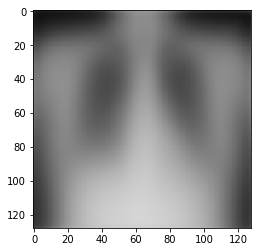

In [23]:
plt.imshow(mean_img)

The above image is the mean of all the training images. It is a good average representation of the entire training dataset.

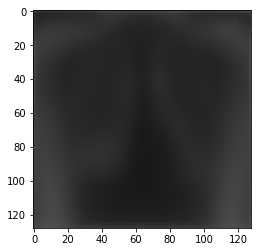

In [24]:
plt.imshow(std_img)

The above image is the standard deviation of all images.

### Normalization

We normalize it using this formula: X = (x - mean of x) / standard deviation of x.

In [25]:
x_train_norm = (x_train - mean_img) / std_img

In [26]:
x_train_norm.shape

(18577, 128, 128, 3)

Our final training data is an 18577x128x128x3 array. This mean that it is an array of 18577 images of size 128x128.

The target variable needs to be encoded as the model needs a array of numbers to train.

In [27]:
class_list = train['detected'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(class_list))}
y_train = [Y_train[k] for k in class_list]

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


We use the `keras` module for this problem. 
Keras is a high-level API written in Python. It runs on top of Tensorflow, CNTK or Theano.
It is relatively easy to use and is very fast.

In [30]:
y_train = to_categorical(y_train)

## Modeling

A Deep learning model consists of a number of layers connected to each other. The input data is passed through each layer, one-by-one. We use a `Sequential` model which is a linear stack of layers.

In [31]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (128,128,3))) # if you resize the image above, change the shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

The input shape (128x128) is passed at the very top of the model. This input is run through all the layers sequentially.

In [32]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

We define an early stopping condition for the model. If the `val_acc` is the same three times, the model stops.

We now train this model using the input data. 
An `epoch` is when the model runs through the entire data once.
`batch_size` is the size by which our input data is split.
`validation_split` splits our data into 70% training and 30% validation.
The below code splits the input data into batches of 100 images and runs them through the model 10 times.

In [35]:
model.fit(x_train_norm, y_train, batch_size=100, epochs=10, validation_split=0.3, callbacks=[early_stops])

Train on 13003 samples, validate on 5574 samples
Epoch 1/10
13003/13003 [==============================] - 48s 4ms/step - loss: 2.1131 - acc: 0.3109 - val_loss: 2.0938 - val_acc: 0.3236
Epoch 2/10
13003/13003 [==============================] - 48s 4ms/step - loss: 2.0166 - acc: 0.3392 - val_loss: 2.0535 - val_acc: 0.3314
Epoch 3/10
13003/13003 [==============================] - 48s 4ms/step - loss: 1.9673 - acc: 0.3528 - val_loss: 2.0539 - val_acc: 0.3297
Epoch 4/10
13003/13003 [==============================] - 48s 4ms/step - loss: 1.8907 - acc: 0.3750 - val_loss: 2.0979 - val_acc: 0.3333
Epoch 5/10
13003/13003 [==============================] - 48s 4ms/step - loss: 1.7992 - acc: 0.4018 - val_loss: 2.0935 - val_acc: 0.3213
Epoch 6/10
13003/13003 [==============================] - 48s 4ms/step - loss: 1.7079 - acc: 0.4290 - val_loss: 2.2177 - val_acc: 0.3114
Epoch 7/10
13003/13003 [==============================] - 48s 4ms/step - loss: 1.5638 - acc: 0.4735 - val_loss: 2.2601 - val_acc:

## Prediction

Now that we have built and trained our model, it is time to precit the test data.

In [34]:
test_img = []
for img in tqdm(test['image_name'].values):
    test_img.append(read_img(TEST_PATH + img))

100%|██████████| 12386/12386 [04:01<00:00, 51.38it/s]


In [36]:
x_test = np.array(test_img, np.float32) / 255.

We import the test data and pass it to an array.

In [37]:
x_test_norm = (x_test - mean_img) / std_img

The test data is normalised.

In [38]:
predictions = model.predict(x_test_norm)
predictions = np.argmax(predictions, axis= 1)

In [39]:
y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]

In [40]:
sub = pd.DataFrame({'row_id':test.row_id, 'detected':pred_labels})
sub.to_csv('submission.csv', index=False)

### This submission gave me a score of 0.267.